In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from sklearn.model_selection import train_test_split
from PIL import Image
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
def create_df(filename, classname, direc):
    X = []
    y = []
    for i in range(len(filename)):
        name = direc + filename[i]
        img = Image.open(name)
        img = img.resize((28,28))
        img_array = np.array(img).reshape((28,28,3))
        img_array = img_array/255
        y.append(classname)
        X.append(img_array.tolist())
    
    arra = np.array(X)
    label = np.array(y)

    return arra, label

In [3]:
mango_filename = os.listdir('./images/mango')
jackfruit_filename = os.listdir('./images/jackfruit')

In [4]:
label_encoding = {'Mango':0,'Jack Fruit':1}

In [5]:
mango_direc = './images/mango/'
jackfruit_direc = './images/jackfruit/'

In [6]:
mango_filename.remove('.DS_Store')


In [7]:
X_mango, y_mango = create_df(mango_filename,
                            label_encoding['Mango'],
                            mango_direc)

In [8]:
X_jackfruit, y_jackfruit = create_df(jackfruit_filename,
                                    label_encoding['Jack Fruit'],
                                    jackfruit_direc)

In [9]:
X = np.append(X_mango,X_jackfruit,axis=0)

In [10]:
y = np.append(y_mango,y_jackfruit,axis=0)

(0.0, 1200.0)

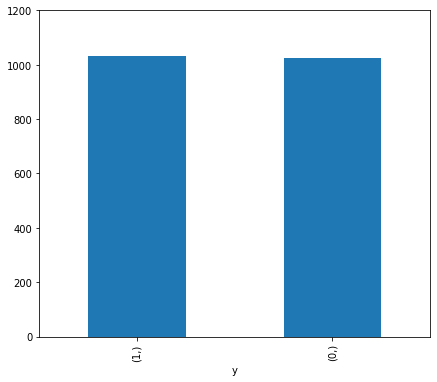

In [11]:
df_y = pd.DataFrame(y,columns=['y'])
df_y.value_counts().plot(kind='bar',figsize=(7, 6))
plt.ylim(0, 1200)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.9)

In [13]:
model = Sequential([
    Conv2D(300,3,input_shape=(28,28,3),activation='relu',padding='same'),
    MaxPooling2D(2,2),
    Dropout(0.2),
    #Conv2D(200,3,activation='relu'),
    #MaxPooling2D(2,2),
    #Dropout(0.1),
    Conv2D(100,3,activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),

    Dense(500,activation='relu'),
    Dropout(0.4),
    #Dense(400,activation='relu'),
    Dense(100,activation='relu'),
    Dropout(0.1),
    Dense(50,activation='relu'),
    Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [14]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
58/58 [==============================] - 18s 289ms/step - loss: 0.6220 - accuracy: 0.6059
Epoch 2/10
58/58 [==============================] - 16s 276ms/step - loss: 0.5045 - accuracy: 0.7611
Epoch 3/10
58/58 [==============================] - 17s 295ms/step - loss: 0.4461 - accuracy: 0.7886
Epoch 4/10
58/58 [==============================] - 17s 296ms/step - loss: 0.4269 - accuracy: 0.8038
Epoch 5/10
58/58 [==============================] - 17s 295ms/step - loss: 0.3500 - accuracy: 0.8470
Epoch 6/10
58/58 [==============================] - 25s 427ms/step - loss: 0.3292 - accuracy: 0.8535
Epoch 7/10
58/58 [==============================] - 18s 306ms/step - loss: 0.3368 - accuracy: 0.8605
Epoch 8/10
58/58 [==============================] - 19s 331ms/step - loss: 0.2814 - accuracy: 0.8795
Epoch 9/10
58/58 [==============================] - 17s 296ms/step - loss: 0.2656 - accuracy: 0.8924
Epoch 10/10
58/58 [==============================] - 17s 286ms/step - loss: 0.2388 - accura

In [15]:
model.evaluate(X_test,y_test)

7/7 [==============================] - 1s 66ms/step - loss: 0.2280 - accuracy: 0.9078


[0.22799904644489288, 0.9077669978141785]

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 300)       8400      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 300)       0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 300)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 100)       270100    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 100)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3600)              0         
_________________________________________________________________
dense (Dense)                (None, 500)               1

In [17]:
y_pred = model.predict(X_test)
y_predict = []
for i in y_pred:
    if i>=0.5:
      y_predict.append(1)
    else:
        y_predict.append(0)

In [18]:
cm = confusion_matrix(y_test, y_predict)
cm

array([[97,  8],
       [11, 90]])

<AxesSubplot:>

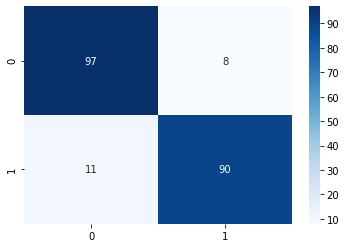

In [19]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

In [20]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       105
           1       0.92      0.89      0.90       101

    accuracy                           0.91       206
   macro avg       0.91      0.91      0.91       206
weighted avg       0.91      0.91      0.91       206



In [27]:
model.save('model.h5')